# Forced Pendulum with Damping

The following programs take a modified version of code from this [paper.](https://arxiv.org/pdf/1306.0949.pdf) Then the pendulum's motion is animated in manim. The first cell should be ran first as it will import every package needed for the page. The second cell should be run afterwards to initialize the physical paramaters for the pendulum, as well as to produce an array with the angles after each time step. Note any changes made on the mybinder page will not be saved unless you save the notebook locally.

In [1]:
from math import *
from scipy import *
import numpy as np
import matplotlib.pyplot as plt
from manim import * #Imports the animation package

Manim Community v0.7.0

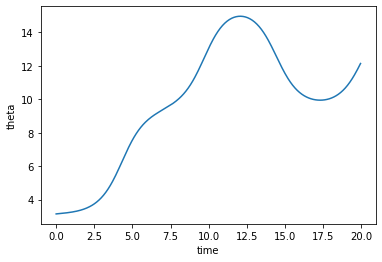

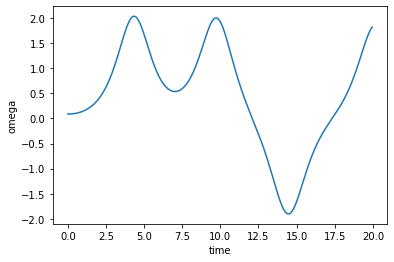

In [2]:
#From Simulation and Visualization of Chaos in a Driven Nonlinear Pendulum 
#– An Aid to Introducing Chaotic Systems in Physics by Louis Ehwerhemuepha and Godfrey E. Akpojotor
#With modifications to constants and updates to compile without error

#Initial theta values
theta0 = (180*2*pi)/360
omega0 = 5*2*pi/360

#Constants
length_of_string = 9.8
gravity = 9.8
drive_frequency = 1/3
damping_force = 0.05

#Defining the driving force - controls the chaos
FD = -0.1

#Assigning the number of data points to be considered
data_points = 400

#Preallocating space for time, theta and omega
time = np.zeros(data_points)
theta = np.zeros(data_points)
omega = np.zeros(data_points)

#Initializing theta and omega
theta[0] = theta0
omega[0] = omega0

#Defining time step size
dt = 0.05

for i in range(0,data_points - 1):
     time[i+1] = time[i] + dt

     #Calculating for FD = 0, 0.1... in omegas
     omega[i+1] = omega[i] - (gravity/length_of_string)*np.sin(theta[i])*dt - (damping_force*omega[i]*dt +FD*np.sin(drive_frequency*time[i])*dt)
     theta[i+1] = theta[i] + omega[i+1]*dt

plt.plot(time,theta)
plt.ylabel("theta")
plt.xlabel("time")
plt.show()

plt.plot(time,omega)
plt.ylabel("omega")
plt.xlabel("time")
plt.show()


## Manim
To learn more about manim visit [here.](https://www.manim.community/)
### Basics for Quick Use
The -qh in the first line refers to the quality of the video. With -ql for low quality, -qm for medium quality, and -qh for high quality. Note as the quality increases so does the run time. There more options for quality available in the documentation.

The last part of the first line must have the same name as the class with the ```def construct(self)```. From there the actual animation begins.

### Example Without Physics
This is a toy example of what will become the pendulum animation.
The first four lines form static shapes. self.add() places those shapes on the screen. If we stopped at that point all that would produced is a still image. The self.play() line allows there to be movement. That line specifies that one dot will rotate one revolution about the other in three seconds. The rod.add_updater() line makes sure that the two dots have a line between them even as they are moving. This prevents us from having to specify an animation for the rod.

In [3]:
%%manim -qh -v WARNING rotation
class rotation(Scene):
    def construct(self):
        sdot = Dot().shift(UP) #Stationary dot that pendulum rotates about
        mdot = Dot().shift(DOWN) #Non-stationary dot
        c = Circle(radius = 2).shift(UP) #Circle to demonstrate it is rotating correctly
        rod = Line(sdot.get_center(),mdot.get_center())
        self.add(c,sdot,mdot,rod)
        rod.add_updater(lambda m: m.become(Line(sdot.get_center(),mdot.get_center())))
        self.play(Rotating(mdot,radians=2*PI,about_point=sdot.get_center()),run_time=3)        

## With Physics
The toy example is altered to contain the physics of the second cell.

Instead of having the dot rotate one revolution, for each time step the dot rotates by the amount the angle changed. This loops until there is a complete animation of the pendulum's motion over time.

### Note
The following two animations are identical except the second one has a polar axis in the background.

The timing of the animation is incorrect when using -ql or -qm please use -qh

In [4]:
%%manim -qh -v WARNING fpend
class fpend(Scene):
    def construct(self):
        #Initializing animation
        sdot = Dot().shift(UP) #Stationary dot that pendulum rotates about
        mdot = Dot().shift(DOWN).rotate(theta0,about_point=sdot.get_center()) #Non-stationary dot
        c = Circle(radius = 2).shift(UP) #Circle to demonstrate it is rotating correctly
        rod = Line(sdot.get_center(),mdot.get_center())
        self.add(sdot,mdot,rod)
        rod.add_updater(lambda m: m.become(Line(sdot.get_center(),mdot.get_center())))
        
        #Implementing the forced pendulum
        for i in range(len(theta)-1):
            angle_change = theta[i+1] - theta[i] #Change in angle
            self.play(Rotating(mdot,radians=angle_change,about_point=sdot.get_center()),run_time=dt)  

In [5]:
%%manim -qh -v WARNING fpend
class fpend(Scene):
    def construct(self):
        #Initializing animation
        sdot = Dot().shift(UP).set_color(RED) #Stationary dot that pendulum rotates about
        mdot = Dot().shift(DOWN).set_color(RED).rotate(theta0,about_point=sdot.get_center()) #Non-stationary dot
        c = Circle(radius = 2).shift(UP) #Circle to demonstrate it is rotating correctly
        rod = Line(sdot.get_center(),mdot.get_center()).set_color(RED)
        p = PolarPlane(radius_max=2,azimuth_offset=3*PI/2).add_coordinates()
        p.shift(UP)
        self.add(p,rod,sdot,mdot)
        rod.add_updater(lambda m: m.become(Line(sdot.get_center(),mdot.get_center()).set_color(RED)))
        
        #Implementing the forced pendulum
        for i in range(len(theta)-1):
            angle_change = theta[i+1] - theta[i] #Change in angle
            self.play(Rotating(mdot,radians=angle_change,about_point=sdot.get_center()),run_time=dt)
        

## Comparison to the Simple Pendulum
The following implements an undamped/undriven simple pendulum (small angle approximation). This is overlayed with the previous pendulum. Both pendulums have the same initial angle but the simple pendulum is released from rest. Try changing the initial conditions in the second cell.

The two pendulums should overlap when:
* The initial angular velocity is 0
* There is no damping or driving forces
* The initial angle is small

The <span style="color:blue"> blue pendulum </span> is the <span style="color:blue">simple pendulum</span>

The <span style="color:red"> red </span> one is the same as the previous examples.

In [6]:
%%manim -qh -v WARNING fpend
class fpend(Scene):
    def construct(self):
        #Initializing animation for the forced pendulum
        sdot = Dot().shift(UP).set_color(PURPLE) #Stationary dot that pendulums rotates about
        mdot = Dot().shift(DOWN).rotate(theta0,about_point=sdot.get_center()).set_color(RED) #Non-stationary dot
        c = Circle(radius = 2).shift(UP) #Circle to demonstrate it is rotating correctly
        rod = Line(sdot.get_center(),mdot.get_center()).set_color(RED)
        self.add(mdot,rod)
        rod.add_updater(lambda m: m.become(Line(sdot.get_center(),mdot.get_center()).set_color(RED)))
        
        #Initializing animation for the simple pendulum
        mdot_simple = Dot().shift(DOWN).rotate(theta0,about_point=sdot.get_center()).set_color(BLUE) #Non-stationary dot
        rod_simple = Line(sdot.get_center(),mdot_simple.get_center()).set_color(BLUE)
        self.add(mdot_simple,rod_simple)
        rod_simple.add_updater(lambda m: m.become(Line(sdot.get_center(),mdot_simple.get_center()).set_color(BLUE)))
        
        self.add(sdot)
        #Implementing the forced pendulum
        def angle_simple(time,theta_0 = theta0,length =length_of_string, acceleration = gravity):
            theta = theta_0 * np.cos(np.sqrt(length/acceleration) * time)
            return theta
        
        for i in range(len(theta)-1):
            angle_change_forced = theta[i+1] - theta[i] #Change in angle
            angle_change_simple = angle_simple(dt * (i +1)) - angle_simple(dt * i)
            self.play(Rotating(mdot,radians=angle_change_forced,about_point=sdot.get_center()),Rotating(mdot_simple,radians=angle_change_simple,about_point=sdot.get_center()),run_time=dt)
        